In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$y = \text{Ave}(y_i|x_i \in N(x))$$

In [2]:
x = np.random.rand(10)
y = np.sin(x) + np.random.randn(10)

In [3]:
x

array([0.94171164, 0.33673618, 0.29375163, 0.2016054 , 0.89312887,
       0.93072225, 0.01814997, 0.01668318, 0.6127004 , 0.0451487 ])

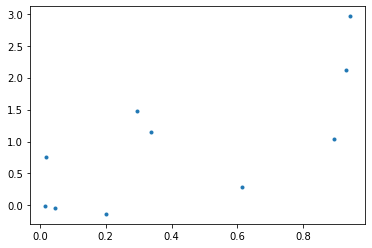

In [4]:
plt.plot(x,y, '.')

In [5]:
p = 0.6

In [6]:
dist = np.fabs(x - p)

In [7]:
dist

array([0.34171164, 0.26326382, 0.30624837, 0.3983946 , 0.29312887,
       0.33072225, 0.58185003, 0.58331682, 0.0127004 , 0.5548513 ])

In [8]:
np.argsort(dist)

array([8, 1, 4, 2, 5, 0, 3, 9, 6, 7])

In [9]:
def knn(arr, x, k):
    dist = np.fabs(arr - x)
    idx = np.argsort(dist)
    return idx[:k]

def gen_knn_average(data, k):
    def knn_average(x):
        idx = knn(data[:,0], x ,k)
        ave = np.mean(np.take(data[:,1], idx))
        return ave
    return knn_average

In [10]:
x

array([0.94171164, 0.33673618, 0.29375163, 0.2016054 , 0.89312887,
       0.93072225, 0.01814997, 0.01668318, 0.6127004 , 0.0451487 ])

In [11]:
y

array([ 2.96171938,  1.14994356,  1.48213481, -0.13411861,  1.04636149,
        2.1171718 ,  0.75319733, -0.00919906,  0.29211097, -0.03416868])

In [12]:
f = gen_knn_average(np.column_stack([x, y]), 3)

In [13]:
f = np.vectorize(f)

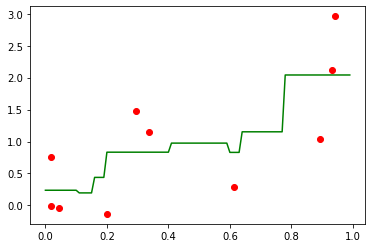

In [14]:
plt.plot(x, y, 'ro')
plt.plot(np.arange(0,1,0.01), f(np.arange(0, 1, 0.01)), 'g-')

In [15]:
def gaussian_kernel(lam, x0, x):
    t = np.fabs(x0 - x) / lam
    return np.exp(-t**2 / 2)

In [16]:
def gen_nadaraya_watson(data, kernel, lam):
    def nadaraya_watson(x):
        def evaluation_kernel(x_i):
            return kernel(lam, x, x_i)

        denominator = np.sum([evaluation_kernel(x_i) for x_i in data[:,0]])
        numerator = np.sum([evaluation_kernel(x_i) * y_i for (x_i, y_i) in data])

        return numerator / denominator
    return nadaraya_watson

In [17]:
data = np.column_stack([x, y])
domain = np.arange(0, 1, 0.01)

In [18]:
g = gen_nadaraya_watson(data, gaussian_kernel, 0.1)

In [19]:
g = np.vectorize(g)

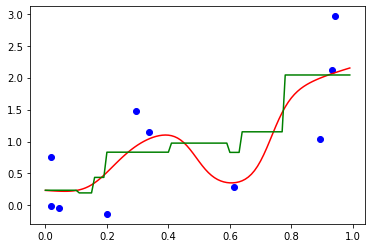

In [20]:
plt.plot(x, y, 'bo')
plt.plot(domain, g(domain), 'r-')
plt.plot(domain, f(domain), 'g-')